<a href="https://colab.research.google.com/github/pmpatel-udallas/PChemLab/blob/main/AI%20Tutorials/Intro%20to%20RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing RDkit

We will first install [conda](https://pypi.org/project/condacolab/) package manager then install all the packages that we need. In this case, RDKit. You can use this method to install other packages in colab

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


After you see the kernel restarting (you will get a notification that the seesion has crashed from unknown reason), run the following cell. The expected output is "**Everything looks OK**!"

In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


Now the conda environment is set up, let us install the packages that we need - rdkit. We will use **conda install** to get **rdkit** package from conda-forge channel (**-c**).

In [2]:
!conda install -c conda-forge rdkit

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hd590300_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       hd590300_1          19 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    chardet-5.2.0              |  py310hff52083_2         238 KB  conda-forge
    co

In [14]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
import pandas as pd
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!jupyter nbextension enable --py widgetsnbextension
from tqdm.notebook import tqdm, tnrange, trange

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Representing molecules as strings is done with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

In [5]:
!git clone https://github.com/pmpatel-udallas/PChemLab.git

Cloning into 'PChemLab'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 84 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 1.41 MiB | 3.13 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [8]:
with open(r'/content/PChemLab/AI Tutorials/H_smiles.dat') as file:
    smiles=file.read()
smiles_list=smiles.strip().split("\n")

In [11]:
smiles_list[:10]

['[H]C([H])([H])[H]',
 '[H]N([H])[H]',
 '[H]O[H]',
 '[H]C#C[H]',
 '[H]C#N',
 '[H]C([H])=O',
 '[H]C([H])([H])C([H])([H])[H]',
 '[H]OC([H])([H])[H]',
 '[H]C#CC([H])([H])[H]',
 '[H]C([H])([H])C#N']

In [17]:
vols=[]
for smi in smiles_list[:500]:
    mol=Chem.MolFromSmiles(smi)
    mol_h=Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_h)
    vols.append(Chem.AllChem.ComputeMolVolume(mol_h))


<ipython-input-18-d94a745ef335>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vols)


<Axes: ylabel='Density'>

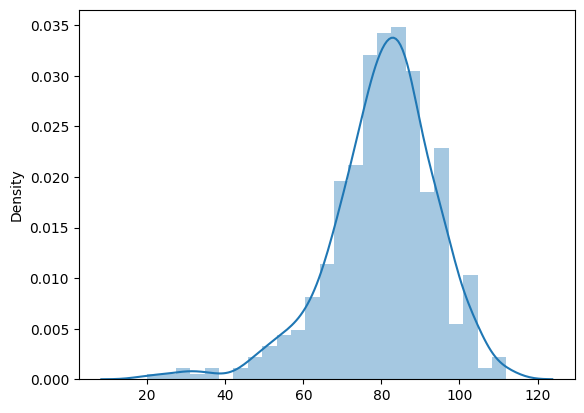

In [18]:
#!pip install seaborn
import seaborn as sns
sns.distplot(vols)

(array([  3.,   4.,   4.,  16.,  35.,  85., 150., 126.,  59.,  18.]),
 array([ 20.016 ,  29.2136,  38.4112,  47.6088,  56.8064,  66.004 ,
         75.2016,  84.3992,  93.5968, 102.7944, 111.992 ]),
 <BarContainer object of 10 artists>)

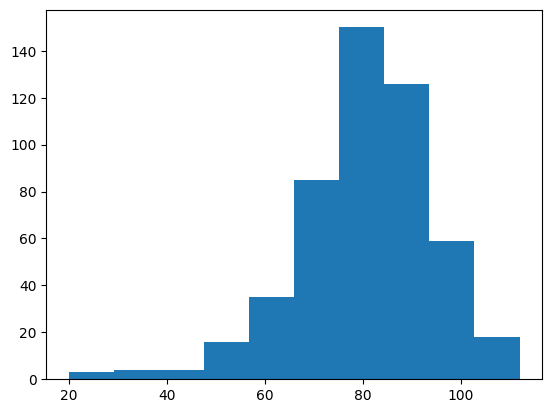

In [19]:
plt.hist(vols)

In [20]:
df = pd.DataFrame(smiles_list,columns=['smiles']).sample(1000)

In [21]:
PandasTools.AddMoleculeColumnToFrame(df,smilesCol="smiles")
df.head()

,smiles,ROMol
50863,[H]C(=O)C([H])([H])C(=O)C([H])([H])C1([H])OC1(...,<rdkit.Chem.rdchem.Mol object at 0x7d4bcc31ff40>
70874,[H]OC12C([H])([H])C3(C([H])([H])[H])OC1([H])C3...,<rdkit.Chem.rdchem.Mol object at 0x7d4bc7ff4040>
43493,[H]N1C(=O)C2([H])C([H])([H])C([H])([H])C2([H])...,<rdkit.Chem.rdchem.Mol object at 0x7d4bc7ff40b0>
40246,[H]N1C([H])([H])C12C([H])([H])C([H])([H])C([H]...,<rdkit.Chem.rdchem.Mol object at 0x7d4bc7ff4120>
128799,[H]N([H])c1noc(C([H])([H])OC([H])([H])[H])n1,<rdkit.Chem.rdchem.Mol object at 0x7d4bc7ff4190>


,smiles,ROMol,target
59414,[H]C(=O)C1(C([H])([H])[H])N(C([H])(C([H])([H])...,,1
123782,[H]n1nnn([H])c1=NC1([H])C([H])([H])C1([H])[H],,2
76214,[H]C1=C(N([H])[H])C([H])(C([H])([H])[H])C(=O)C1=O,,1
103690,[H]C#CC1(C([H])([H])[H])C([H])([H])C1(C([H])([...,,1
64329,[H]N1C(=O)N([H])C(C([H])([H])[H])(C([H])([H])[...,,1

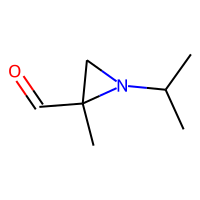
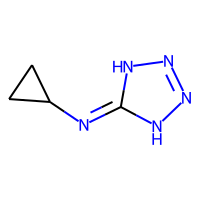
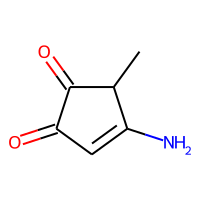
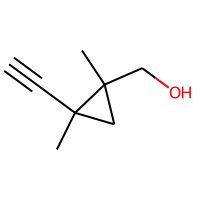
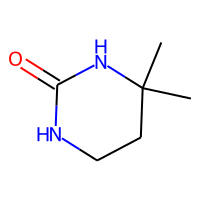

In [ ]:
# generating the target values - molecular weights.
# we use the CalcExactMolWt function from rdkit
df["target"] = df["ROMol"].apply(CalcNumRings)
df.head()

,smiles,ROMol,target,input
59414,[H]C(=O)C1(C([H])([H])[H])N(C([H])(C([H])([H])...,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
123782,[H]n1nnn([H])c1=NC1([H])C([H])([H])C1([H])[H],,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
76214,[H]C1=C(N([H])[H])C([H])(C([H])([H])[H])C(=O)C1=O,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
103690,[H]C#CC1(C([H])([H])[H])C([H])([H])C1(C([H])([...,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
64329,[H]N1C(=O)N([H])C(C([H])([H])[H])(C([H])([H])[...,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."

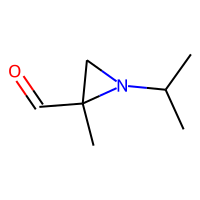
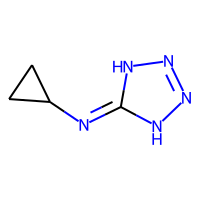
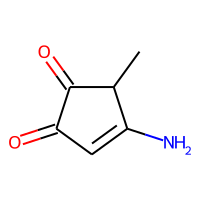
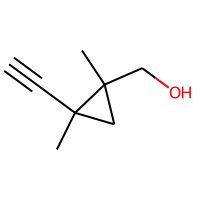
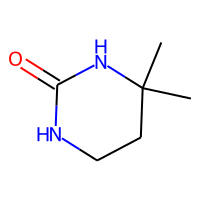

In [ ]:
# we define a function to generate a vector from a molecule object

def get_input(mol):
    fp = GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) # gets the vector
    arr = np.zeros((0,))
    ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
    return arr

df["input"] = df["ROMol"].apply(get_input) # adding the input column to the dataframe
df.head()

## Machine Learning Model
Trying to predict the number of rings given a specific representation

Input - Fingerprints

Output - Number of Rings

In [ ]:
# The input values must be in the for of a vector/list
# Here we assign the values from the dataframe to X and y
X = df["input"].values.tolist()
y = df["target"].values.tolist()
print("Input",X[0])
print("Target",y[0])

Input [0. 0. 0. ... 0. 0. 0.]
Target 1


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) # split data for training and testing
model = RandomForestClassifier(random_state=42) # initialize the model
model.fit(X_train, y_train) # train the model
y_predict = model.predict(X_test) # get prediction on the test set


<AxesSubplot:>

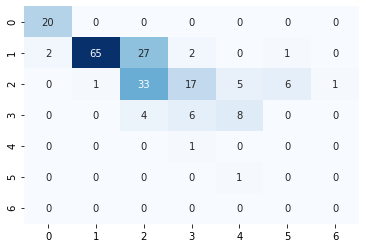

In [ ]:
confusion_mat = metrics.confusion_matrix(y_predict,y_test)
sns.heatmap(confusion_mat,annot=True,cmap="Blues",cbar=False)

In [ ]:
from sklearn.linear_model import Lasso
df["MM"] = df["ROMol"].apply(CalcExactMolWt)
X = df["input"].values.tolist()
y = df["MM"].values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) # split data for training and testing
model = Lasso(random_state=58) # initialize the model
model.fit(X_train, y_train) # train the model
y_predict = model.predict(X_test) # get prediction on the test set


Text(0, 0.5, 'Predicted values')

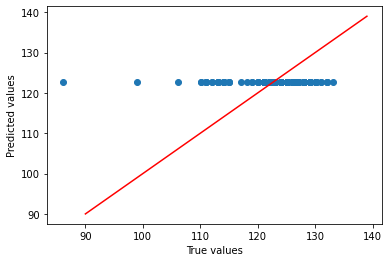

In [ ]:
metrics.mean_squared_error(y_predict,y_test)
plt.scatter(y_test,y_predict)
x = np.arange(90,140)
plt.plot(x,x,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [ ]:
metrics.mean_squared_error(y_predict,y_test)

33.77805584217574